<img src = excelrlogo.png/>

### ASSIGNMENT-15 -- RANDOM FOREST

#### PROBLEM STATEMENT --- Fraud_check_Random

- Use Random Forest to prepare a model on fraud data 
+ treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
Fraud_check_Random = pd.read_csv("Fraud_check_Random.csv")
Fraud_check_Random

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#### TAKE BASIC INFORMATION FROM THE DATA & EDA

In [4]:
Fraud_check_Random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
Fraud_check_Random.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
Fraud_check_Random.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
Fraud_check_Random_Dumy = Fraud_check_Random.copy()
Fraud_check_Random_Dumy

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
Fraud_check_Random_Dumy.insert(6,'tax_class'," ")

for i in range(0,len(Fraud_check_Random_Dumy['Taxable.Income']),1):
    if Fraud_check_Random_Dumy['Taxable.Income'].iloc[i]<=30000:
        Fraud_check_Random_Dumy['tax_class'].iloc[i]='Risky'
    else:
        Fraud_check_Random_Dumy['tax_class'].iloc[i]='Good'

C:\Users\gk521\AppData\Local\Temp\ipykernel_16732\1981939057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fraud_check_Random_Dumy['tax_class'].iloc[i]='Good'
C:\Users\gk521\AppData\Local\Temp\ipykernel_16732\1981939057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fraud_check_Random_Dumy['tax_class'].iloc[i]='Risky'


In [9]:
Fraud_check_Random_Dumy

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [10]:
Fraud_check_Random_Dumy.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

#### DROP THE Taxable.Income COLUMN

In [11]:
Fraud_check_Random_Dumy.drop(['Taxable.Income'],axis=1,inplace=True)
Fraud_check_Random_Dumy

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Fraud_check_Random_Dumy['Undergrad']= label_encoder.fit_transform(Fraud_check_Random_Dumy['Undergrad'])
Fraud_check_Random_Dumy['Marital.Status']= label_encoder.fit_transform(Fraud_check_Random_Dumy['Marital.Status'])
Fraud_check_Random_Dumy['Urban']= label_encoder.fit_transform(Fraud_check_Random_Dumy['Urban'])
Fraud_check_Random_Dumy['tax_class']= label_encoder.fit_transform(Fraud_check_Random_Dumy['tax_class'])

In [14]:
Fraud_check_Random_Dumy

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
Fraud_check_Random_Dumy.iloc[:,2:4]=StandardScaler().fit_transform(Fraud_check_Random_Dumy.iloc[:,2:4])
Fraud_check_Random_Dumy

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


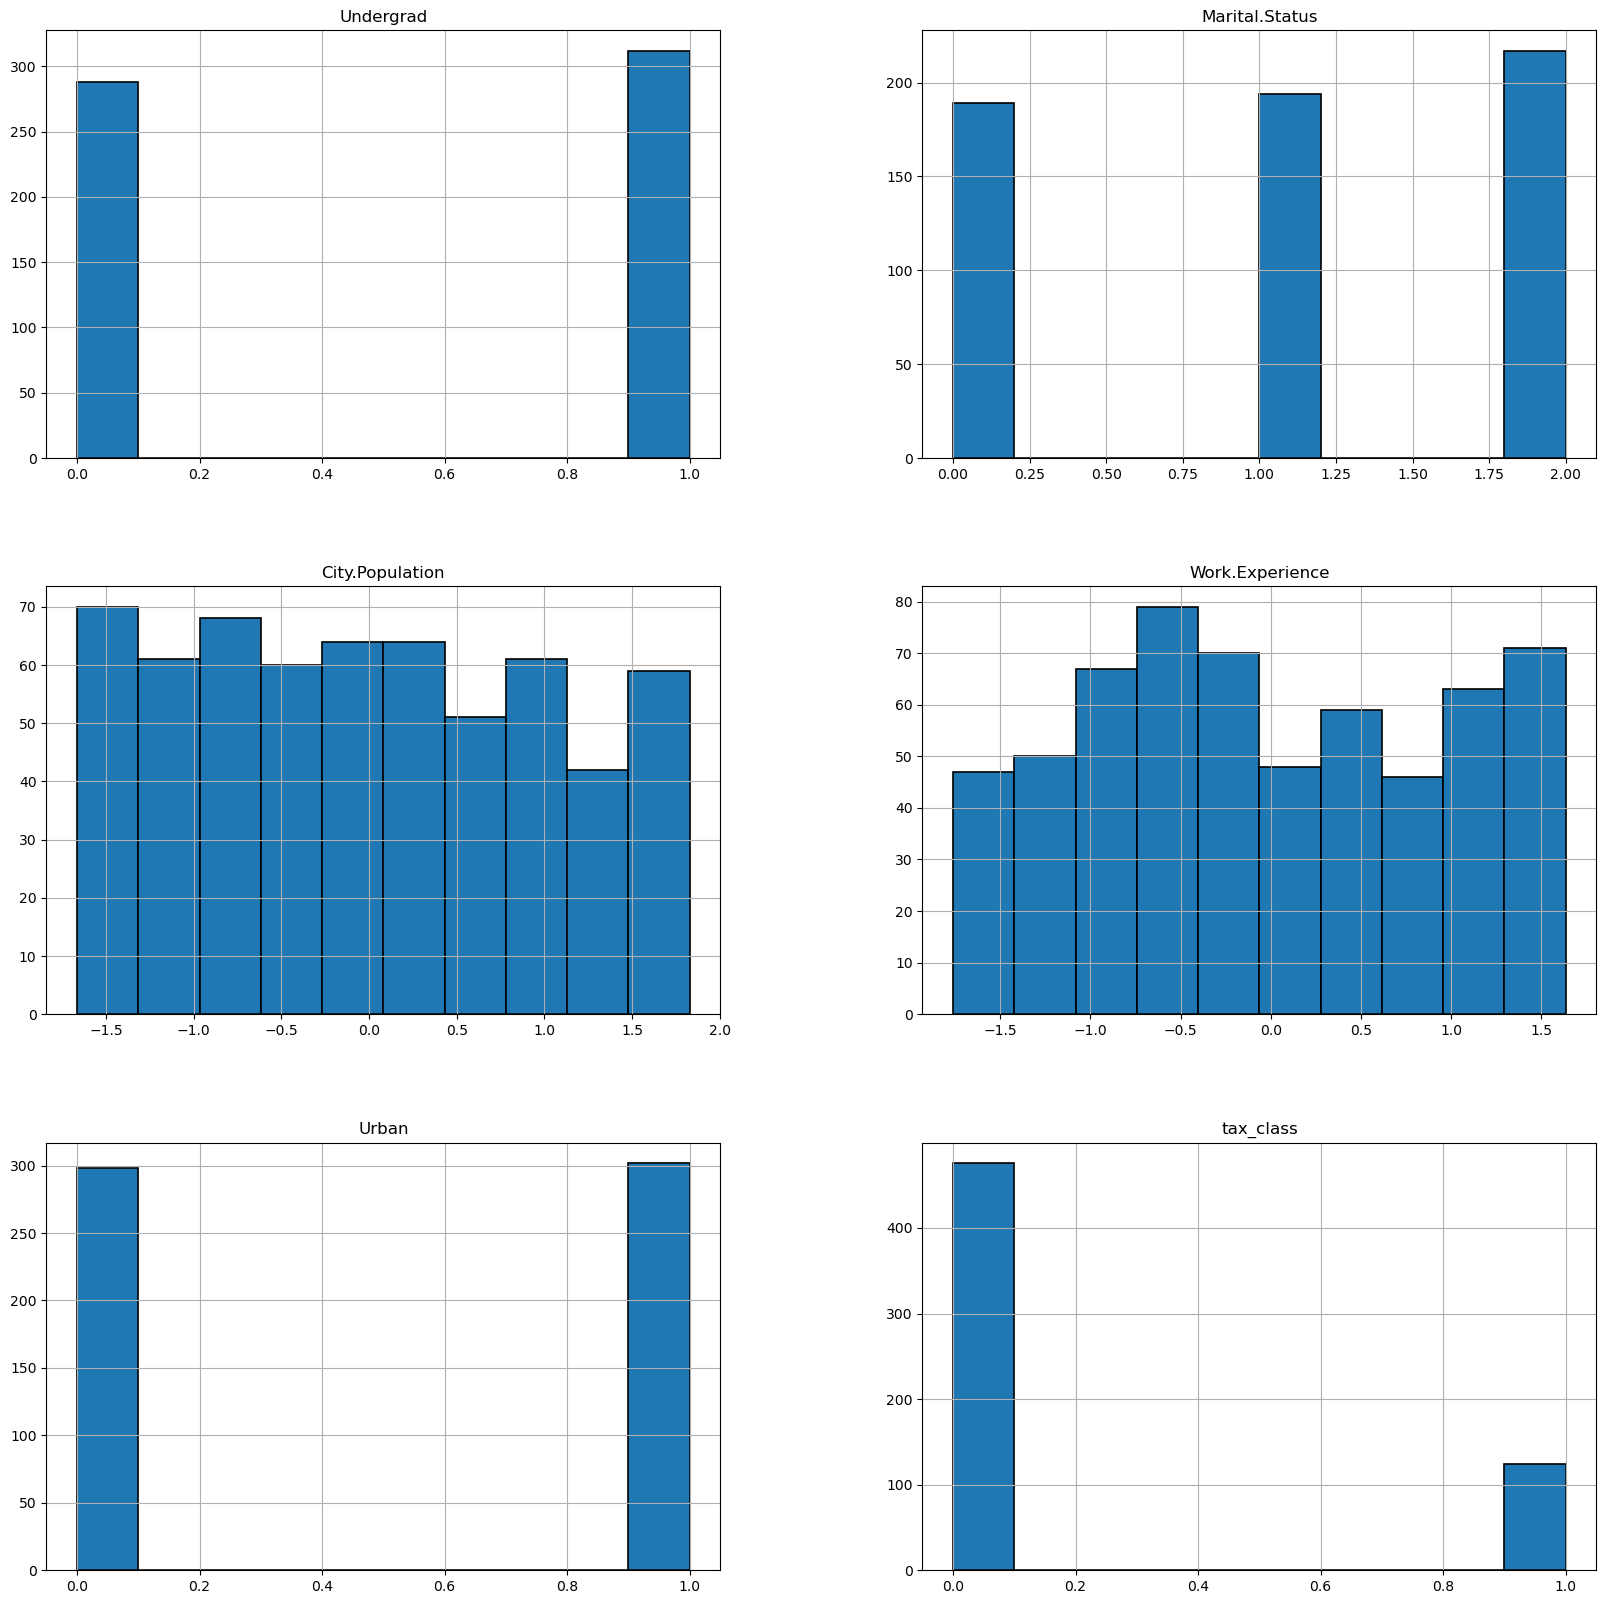

In [16]:
Fraud_check_Random_Dumy.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [17]:
Fraud_check_Random_Dumy.to_csv('auto.csv')

<Axes: >

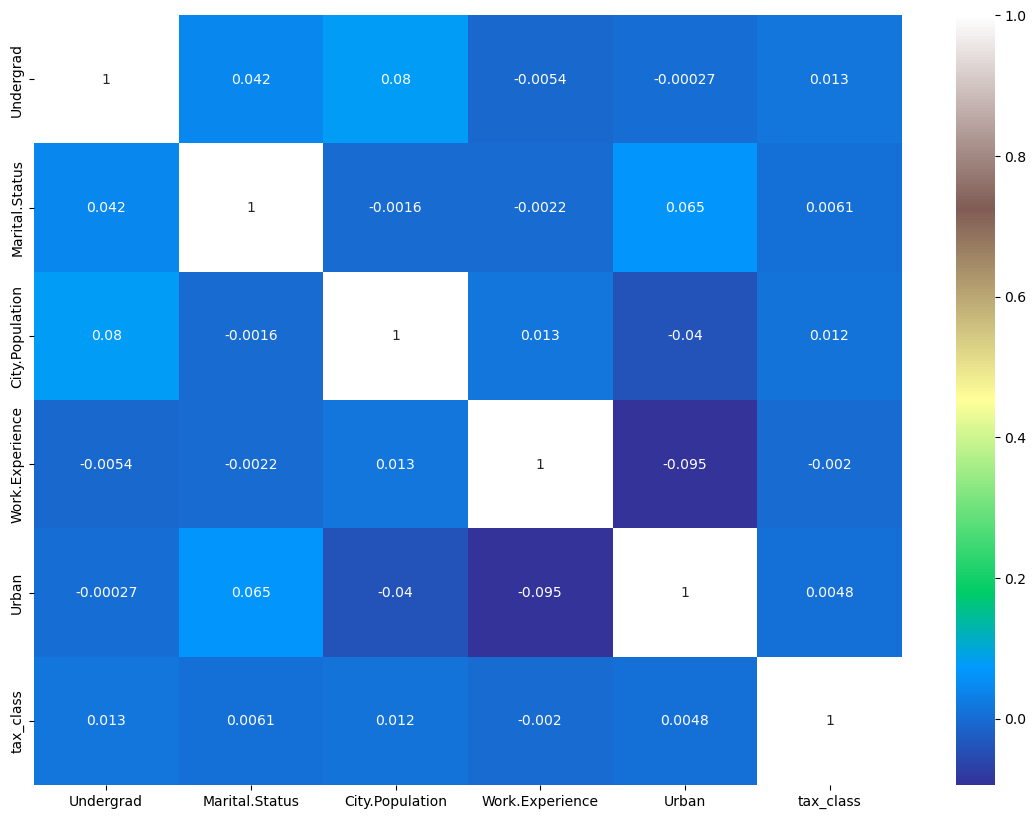

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(Fraud_check_Random_Dumy.corr(),annot=True,cmap='terrain')

In [19]:
pFraud_check_Random = Fraud_check_Random_Dumy.copy()
pFraud_check_Random

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


In [20]:
x = pFraud_check_Random.iloc[:,0:-1]
y = pFraud_check_Random['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

#### Model building using Random forest

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [23]:
model_build = RandomForestClassifier()
model_build.fit(x_train,y_train)
predic = model_build.predict(x_test)
print(np.mean(y_test==predic))

0.7666666666666667


#### Using grid search optimisation

In [24]:
model_build = RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model_build.fit(x,y)
predic = model_build.predict(x)
print(np.mean(y==predic))

0.7933333333333333


#### Applying K-Fold cross Validation

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(model_build,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


#### Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier
model_new = RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
model_b1 = BaggingClassifier(base_estimator=model_new)
results=cross_val_score(model_b1,x,y,cv=kfold)
print(results.mean())

C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-p

0.7933333333333332


#### Boosting

In [29]:
from sklearn.ensemble import AdaBoostClassifier
model_b1 = AdaBoostClassifier(base_estimator=model_build)
results = cross_val_score(model_b1,x,y,cv=kfold)
print(results.mean())

C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-p

0.75


#### Voting classifier

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
estimators=[]
model_new = LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model_new))
model_new1 = DecisionTreeClassifier()
estimators.append(('cart',model_new1))
model_new2 = SVC()
estimators.append(('svm',model_new2))
model_new3 = AdaBoostClassifier(base_estimator = model_new)
estimators.append(('adaboost',model_new3))
model_new4 = BaggingClassifier(base_estimator = model_new)
estimators.append(('bagging',model_new4))
model_new5 = RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model_new5))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\gk521\anaconda3\lib\site-p

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]


In [36]:
print(results.mean())

0.7933333333333332


#### XGBM

In [37]:
from tqdm.notebook import tqdm, trange
import time
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Make Predictions for test data

In [39]:
y_predic = xgmodel.predict(x_test)
predictions = [round(value) for value in y_predic]

In [40]:
y_predic1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_predic1]

In [41]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.83%


In [42]:
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [47]:
predictions = [round(value) for value in y_predic]

In [48]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7083333333333334

### CONCLUSION

This code demonstrates a comprehensive analysis of fraud detection using various machine learning techniques, including random forests, ensemble methods, and XGBoost. The models are evaluated for accuracy, providing a solid foundation for further optimization and deployment.

### Thank You!